Q1. Develop a program that would use appropriate hand coded morphological operations to enhance the given fingerprint.png image as the resultant output image.

[[1 1 1]
 [1 1 1]
 [1 1 1]]


True

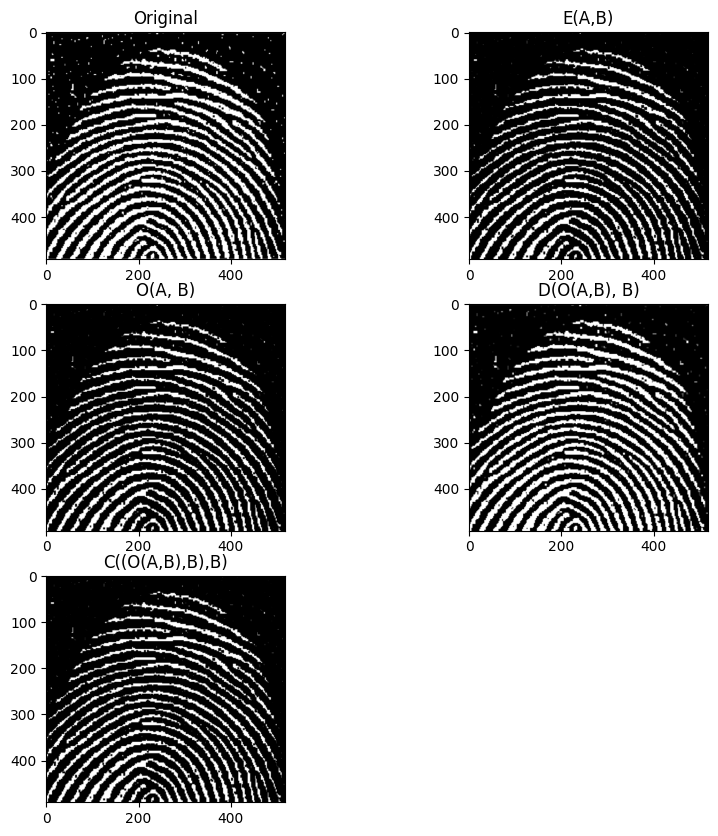

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Read the image for erosion
# img1= cv2.imread("fingerprint.png")
# m,n= img1.shape
# plt.imshow(img1, cmap="gray")
#Use of opening and closing for morphological filtering
#Perform the following operation on the noisy fingerprint image
# [(((AoB)d B) e B)]
#AoB= (A e B) d B
#o=opening, e=erosion,d=dilation
#Here inbuilt function of erosion and dilation from cv2 module is used.
#To form the structuring element also, inbuilt function from cv2 is used
#Function for erosion
def erosion(img, SE):
 imgErode= cv2.erode(img,SE,1)
 return imgErode
#Function for dilation
def dilation(img, SE):
 imgDilate= cv2.dilate(img,SE,1)
 return imgDilate
#Read the image for dilation
img= cv2.imread("fingerprint.png",0)
img_finger=cv2.imwrite("finger.png", img)
#Define the structuring element using inbuilt CV2 function
SE= cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) 
print(SE)
#Erode the image
AeB= erosion(img,SE)
#Dilate the eroded image. This gives opening operationAoB= dilation(AeB, SE) 
#dilate the opened image followed by ersoion. This will give closing of the opened image
AoBdB= dilation(AeB,SE) 
AoBdBeB= erosion(AoBdB, SE)
# AoBdBeB= dilation(AoBdBeB, SE)
#Plot all the images
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(3,2,2)
plt.title("E(A,B)")
plt.imshow(AeB, cmap="gray")
plt.subplot(3,2,3)
plt.title("O(A, B)")
plt.imshow(AeB, cmap="gray")
plt.subplot(3,2,4)
plt.title("D(O(A,B), B)")
plt.imshow(AoBdB, cmap="gray")
plt.subplot(3,2,5)
plt.title("C((O(A,B),B),B)")
plt.imshow(AoBdBeB, cmap="gray")
#Save the filtered image
cv2.imwrite("finger_filtered.png", AoBdBeB)

Q2)Implement your own program to detect number of circles in the image dicks.png using the circle Hough transforms method and compare the obtained output with built-in function output.

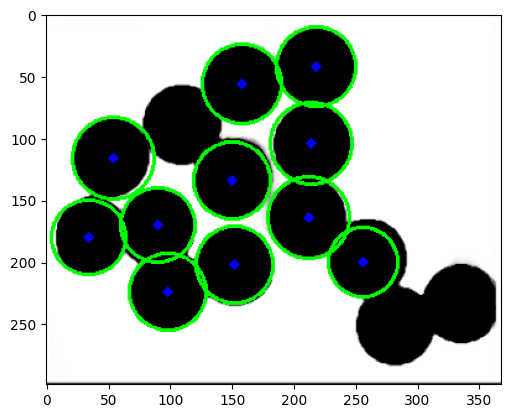

In [44]:
import numpy as np
import cv2 as cv
img = cv.imread('disks.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',cimg)
plt.imshow(cimg)
cv2.imwrite("detected_c.png",cimg)
# cv.waitKey(0)
cv.destroyAllWindows()

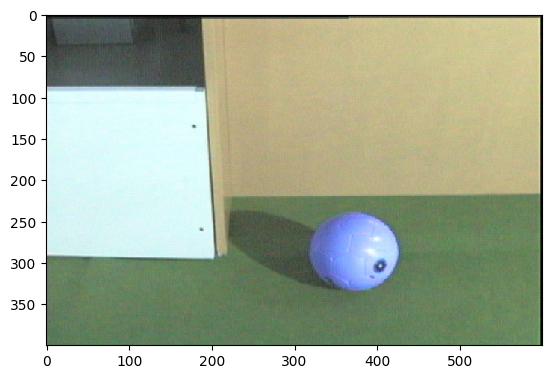

In [45]:
img=cv2.imread("ball.bmp")
hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# cv2.imshow('HSV image',img)
plt.imshow(img)
# h,s,v = cv2.split(img)
# hsv_split = np.concatenate((h,s,v),axis=1)
# cv2.imshow("Split HSV",hsv_split)
# plt.imshow(hsv_split)

# # cv2.waitKey(0)
# cv2.destroyAllWindows()


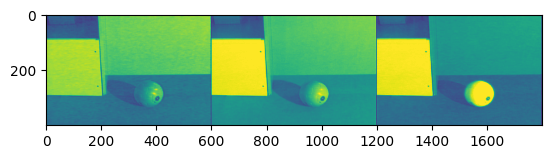

In [46]:
h,s,v = cv2.split(img)
hsv_split = np.concatenate((h,s,v),axis=1)
cv2.imshow("Split HSV",hsv_split)
plt.imshow(hsv_split)

400
600


C:\Users\maqui\AppData\Local\Temp\ipykernel_7676\1758306662.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  numi=1/2*((R-G)+(R-B));
C:\Users\maqui\AppData\Local\Temp\ipykernel_7676\1758306662.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  denom=((R-G)**2+((R-B)*(G-B)))**0.5;
C:\Users\maqui\AppData\Local\Temp\ipykernel_7676\1758306662.py:16: RuntimeWarning: invalid value encountered in arccos
  H=np.arccos(numi/(denom+0.000001))
C:\Users\maqui\AppData\Local\Temp\ipykernel_7676\1758306662.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  S = 1 - (3/ (R+G+B)) * min(R,G,B)
C:\Users\maqui\AppData\Local\Temp\ipykernel_7676\1758306662.py:25: RuntimeWarning: overflow encountered in ubyte_scalars
  I=(R+G+B)/3
C:\Users\maqui\AppData\Local\Temp\ipykernel_7676\1758306662.py:21: RuntimeWarning: divide by zero encountered in divide
  S = 1 - (3/ (R+G+B)) * min(R,G,B)


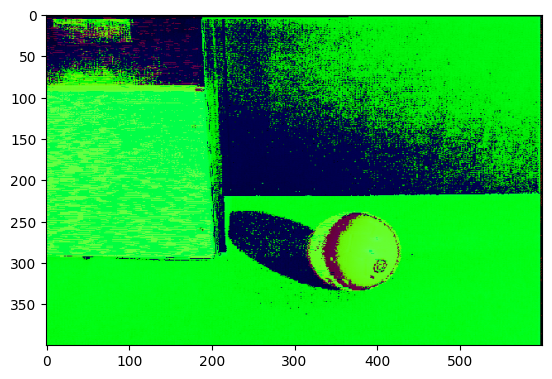

In [47]:
img1=cv2.imread("ball.bmp")
I=img1/255
m=img1.shape[0]
n=img1.shape[1]
print(m)
print(n)
for i in range(m):
    for j in range(n):

        #hue
        R=img[i][j][0]
        G=img[i][j][1]
        B=img[i][j][2]
        numi=1/2*((R-G)+(R-B));
        denom=((R-G)**2+((R-B)*(G-B)))**0.5;
        H=np.arccos(numi/(denom+0.000001))
        if B>G:
            H=360-H
        # H=H/360
        img[i][j][0]=H
        S = 1 - (3/ (R+G+B)) * min(R,G,B)
        img[i][j][1]=S

        #Intensity
        I=(R+G+B)/3
        img[i][j][2]=I

plt.imshow(img)
        


    



Q4. Write a program to match the given two images based of Feature Matching technique. Use SIFT algorithm for feature detection and use bruteforce approach for feature matching. Use simA.jpg and simB.jpg to test the program. NOTE: install "pip install opencv-contribpython" to use builtin SIFT descriptor.

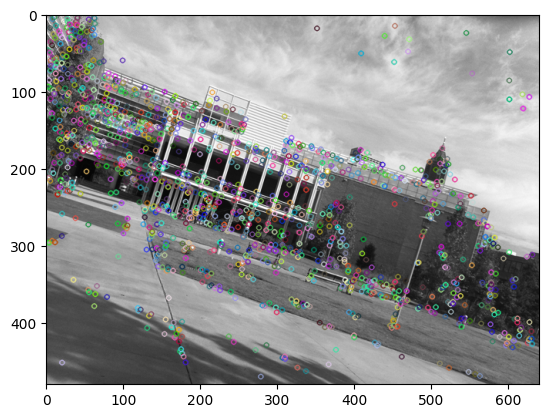

In [48]:
import numpy as np
import cv2 as cv
img = cv.imread('simB.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp1 = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp1,img)
# cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img)

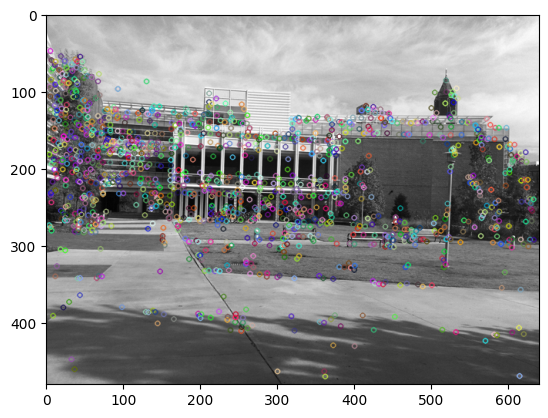

In [49]:
img = cv.imread('simA.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp2 = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp2,img)
# cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img)

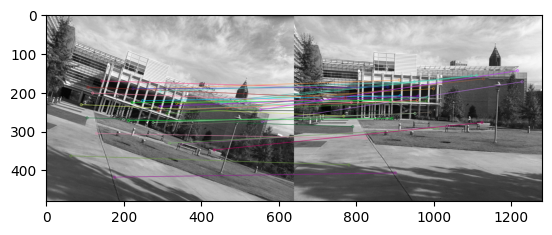

(<matplotlib.image.AxesImage at 0x14488fa62c0>, None)

In [50]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('simB.jpg')  
img2 = cv2.imread('simA.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
# matches = bf.match(kp1,kp2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:30], img2, flags=2)
plt.imshow(img3),plt.show()


 q6)Implement k-means cluster based segmentation for gray scale images. Compare the segmentation outputs for different k values (k=2,3). Use scene.jpeg to test your code

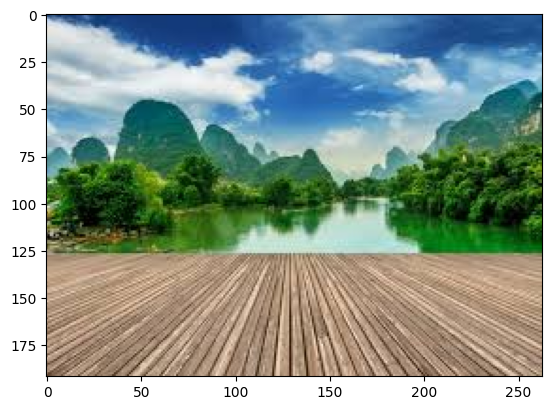

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('scene.jpeg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)


In [52]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


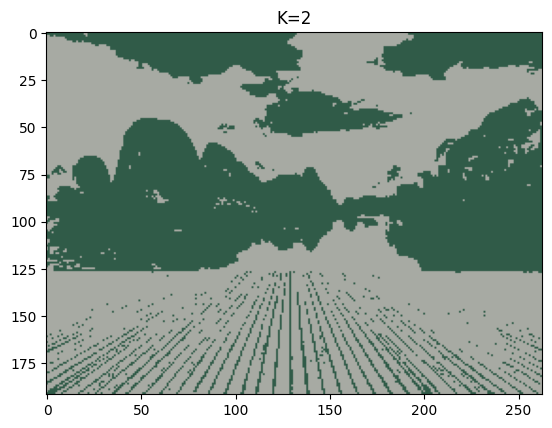

In [53]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.title("K=2")
plt.imshow(segmented_image)


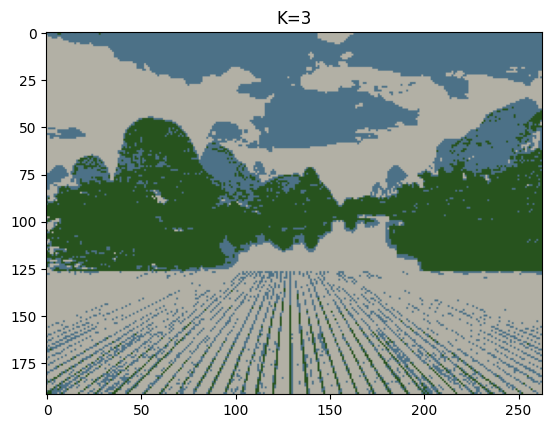

: 

In [56]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.title("K=3")
plt.imshow(segmented_image)


As you can see with an increase in the value of k, the image becomes clearer and distinct because the K-means algorithm can classify more classes/cluster of colors